In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from yellowbrick.cluster import KElbowVisualizer

#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn import preprocessing
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn.feature_selection import SelectFromModel
import  catboost
from catboost import * 
from catboost import CatBoostClassifier, Pool, cv
from catboost import MetricVisualizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.ensemble import GradientBoostingClassifier as Gboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, roc_curve
from sklearn.metrics import make_scorer, confusion_matrix, classification_report


#import warnings
#warnings.filterwarnings('always')

## Sections ##

1. Problem definition


2. Loading data


3. Understanding the data


4. Distribution of variables

   4.1 Target
   
   4.2 Features
   
   4.2.1 Imputing
    

5. Data Preparation

    5.1. Feature transformation

    5.2. Balanced and split data
    

6. Algorithm Evaluation

    6.1. CatBoost 

    6.2. Logistic Regression

    6.3   KNeighborsClassifier
    

7. ROC AUC metric for KNeighborsClassifier, Decision Tree, RandomForestClassifier, GBoost, LinearDiscriminantAnalysis, LGBMClassifier, AdaboostClassifier models with default settings


8. Improve KNC
    
   
9. Result Presentation


10. Resources







  # 1. Problem definition #

One of the key tasks of the bank is to be able to determine to whom it can extend credit and to whom it cannot. Historically, it has been proven that a large part of the bank's profit is formed precisely from the service of providing credits. Every single bank follows the Basel Committee on Banking Supervision regulations. In case of delay or non-return of credit, it is obliged to freeze part of its assets, thereby depriving itself of the opportunity to invest them and receive a profit.

 Banks as a conservative institution adhere to models that are interpretable, I will use a large number of models that are black boxes, but can be used as auxiliary for the bank to make the right decision, on such an important issue as credit scoring.

# 2. Loading data #

In [3]:
df_2 = pd.read_csv('dataset_credit_scoring.csv')
df_2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df_2.shape

(5960, 13)

# 3. Understanding the data #

In [5]:
df_2.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
df_2.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# 4. Distribution of variables # 

## 4.1 Target ##

0    4771
1    1189
Name: BAD, dtype: int64


<AxesSubplot:>

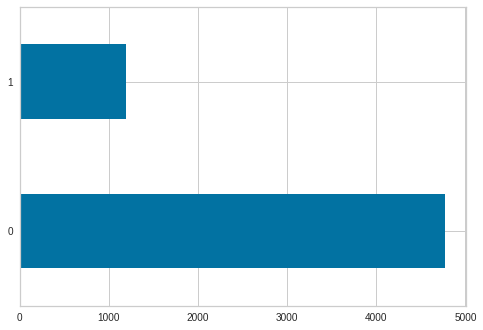

In [7]:
print(df_2['BAD'].value_counts())
df_2['BAD'].value_counts().plot.barh()

In [8]:
df_2.BAD.value_counts()/len(df_2) * 100 
# 1 = client defaulted on loan; 0 = loan repaid
# zeroes are about 80% and ones are about 20%
# The target class is an unbalanced 

0    80.050336
1    19.949664
Name: BAD, dtype: float64

## 4.2 Features ##

<AxesSubplot:ylabel='Frequency'>

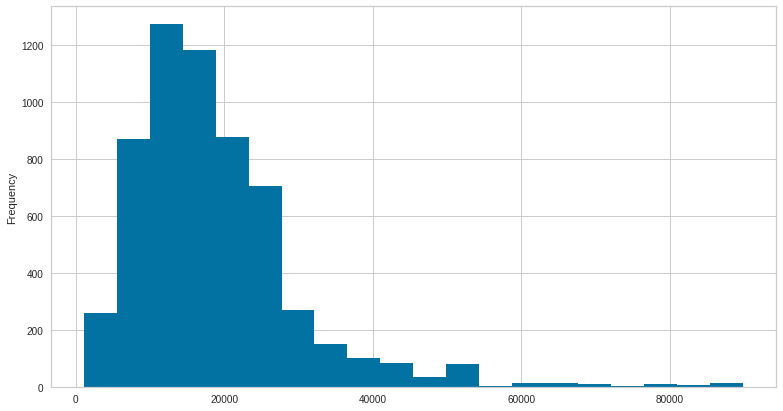

In [9]:
df_2["LOAN"].plot.hist(bins = 20, figsize=(13, 7)) # high destiny 10000 - 30000, we can cap off values >= 60000

<AxesSubplot:ylabel='Frequency'>

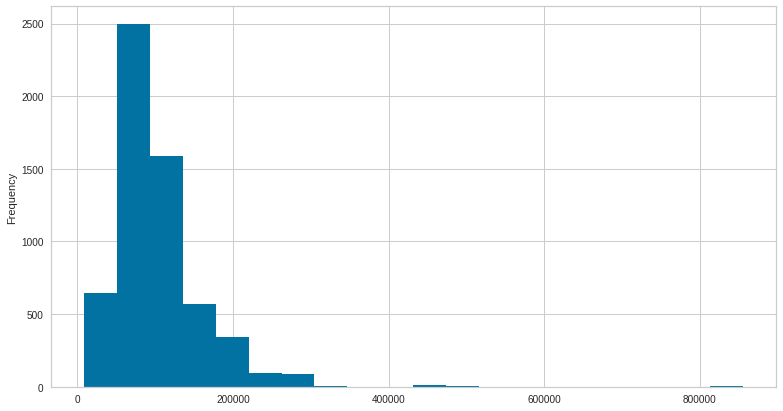

In [10]:
df_2["VALUE"].plot.hist(bins = 20, figsize=(13, 7)) # high destiny 80000 - 100000, we can cap off values >= 40000

<AxesSubplot:ylabel='Frequency'>

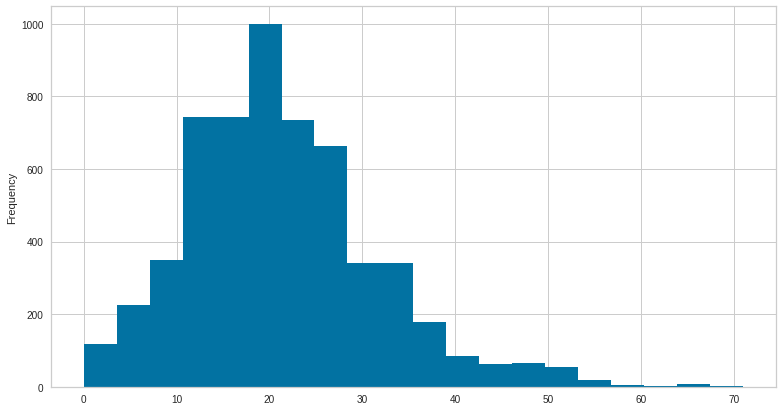

In [11]:
df_2["CLNO"].plot.hist(bins = 20, figsize=(13, 7)) # good distribution no need to modify

<AxesSubplot:ylabel='Frequency'>

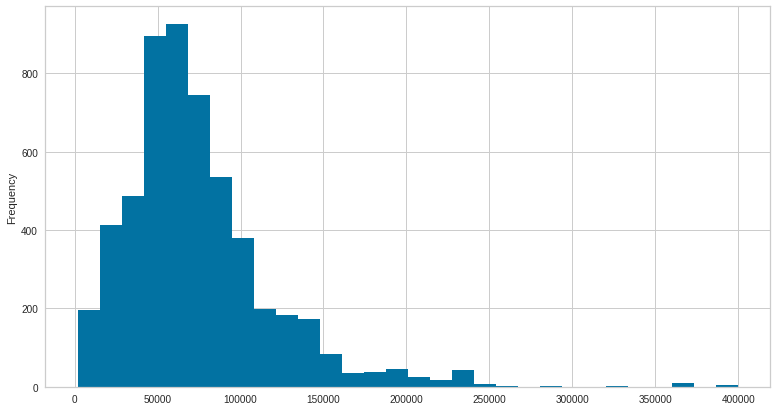

In [12]:
df_2["MORTDUE"].plot.hist(bins = 30, figsize=(13, 7))# high population around 50000 - 100000, the values > = 300000 can be cap off

<AxesSubplot:ylabel='Frequency'>

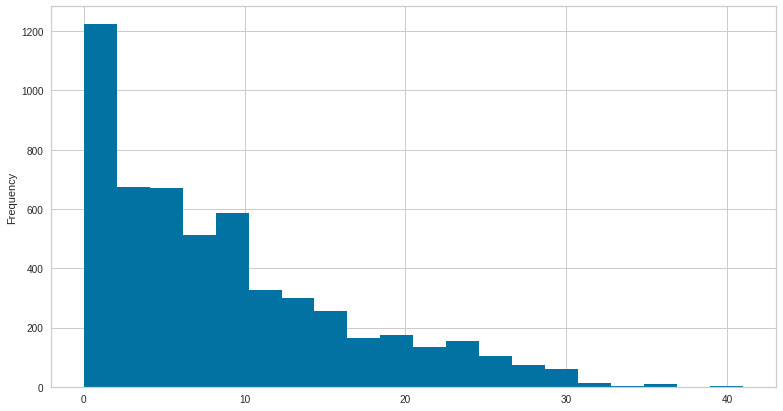

In [13]:
df_2["YOJ"].plot.hist(bins = 20, figsize=(13, 7))# Good idea here is to modify this variable to decrease the skewness

<AxesSubplot:ylabel='Frequency'>

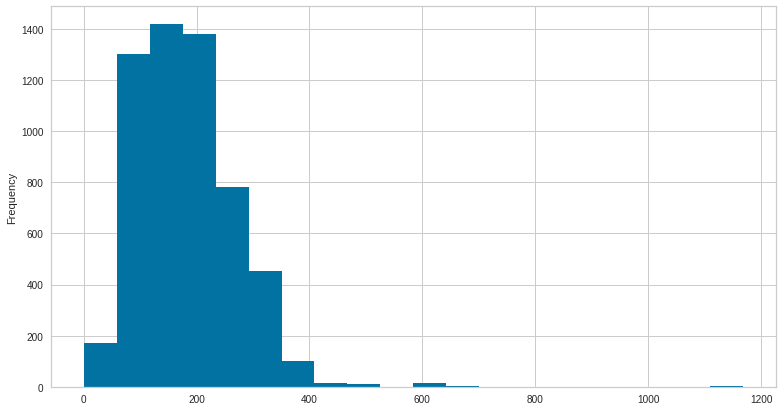

In [14]:
df_2["CLAGE"].plot.hist(bins = 20, figsize=(13, 7)) # Denisty is high around 100  - 300, values >= 600 can cap off

<AxesSubplot:ylabel='Frequency'>

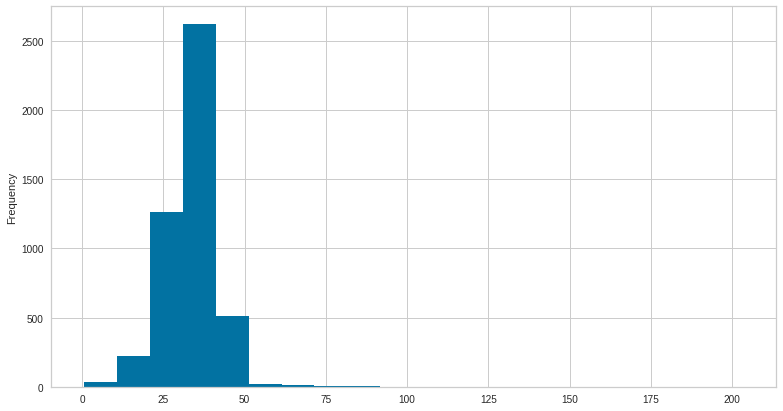

In [15]:
df_2["DEBTINC"].plot.hist(bins = 20, figsize=(13, 7)) # Denisty is high around 25  - 50, values >= 100 can cap off

JOB and REASON must be modified (for logistic regression)
For imputing the missing values in case of nominal features, replacing them with majority class, in case of other numerical inputs, we can replace them by median

In [16]:
print(df_2["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


In [17]:
print(df_2["REASON"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [18]:
df_2["DELINQ"].value_counts() #binary variable would be  useful

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [19]:
df_2["DEROG"].value_counts() # derogatory incidents were reported only in a few cases, we can create binary variable

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [20]:
df_2["NINQ"].value_counts() #distributed mostly among first 5  values

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

Distributions are fine, YOJ  is higly skewed

## 4.2.1 Imputing ##

In [21]:
df_2.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [22]:
df_2["REASON"].fillna(value = "DeptCon", inplace = True) # replacement using majority class in case of REASON variable is DeptCon

In [23]:
df_2["JOB"].fillna(value = "Other", inplace = True) # replacement using majority class

In [24]:
df_2["DEROG"].fillna(value = 0, inplace = True)

In [25]:
df_2["DELINQ"].fillna(value = 0, inplace = True)

In [26]:
df_2.fillna(value = df_2.median(numeric_only=True), inplace = True)

In [27]:
df_2.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# 5. Data Preparation #

## 5.1 Feature transformation ##

As we mentioned in section 4.2 Features we need to transform some variables to improve predictability

In [28]:
df_2.loc[df_2["CLAGE"]>=600, "CLAGE"] = 600
df_2.loc[df_2["VALUE"]>=40000, "VALUE"] = 40000
df_2.loc[df_2["MORTDUE"]>=300000, "MORTDUE"] = 300000
df_2.loc[df_2["DEBTINC"]>=100, "DEBTINC"] = 100

decrease the skewness of YOJ

In [29]:
df_2["YOJ"] = df_2["YOJ"].apply(lambda x: np.log(x+1))

In [30]:
df_2["B_DEROG"] = (df_2["DEROG"]>=1)*1
df_2["B_DELINQ"] = (df_2["DELINQ"]>=1)*1

 ## 5.2 Feature Selection ##

Find features with correlation > 0.75 and delete them 

In [31]:
cor = df_2.corr()

In [32]:
all_features = list(cor.columns)
features_to_del = []
for i in cor.columns:
    if i == 'BAD':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j == 'BAD':
            continue
        else:
            if abs(cor.loc[i,j]) > 0.75:
                if abs(cor.loc['BAD', i]) > abs(cor.loc['BAD', j]):
                    features_to_del.append(j)
                else:
                    features_to_del.append(i)

In [33]:
features_to_del = set(features_to_del)

In [34]:
for i in features_to_del:
    del df_2[i]
df_2.shape

(5960, 14)

## 5.3. Balanced and split data ##

In [35]:
X = df_2.drop(columns = ['BAD', 'JOB', 'REASON'])
y = df_2['BAD']

In [36]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({1: 4771, 0: 4771})


Now we are ready to split data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, shuffle = True, random_state = 22, stratify = y_ros)

In [38]:
print(X_train.shape, X_test.shape)

(7633, 11) (1909, 11)


In [39]:
print(y_train.shape, y_test.shape)

(7633,) (1909,)


Let's check how similar are X_test and X_ros

In [40]:
test_mean = np.mean(X_test, axis = 0)
pred_mean = np.mean(X_ros, axis = 0)
print(len(test_mean), len(pred_mean))

11 11


In [41]:
ttest_ind(test_mean, pred_mean)

Ttest_indResult(statistic=-0.0024391075067699444, pvalue=0.9980780409670051)

Although we have looked at all the variables and tried to remove the outlying values, we will try using elbow method for KMeans clustering to find out how many clusters form in our data and with DBSCAN to find out if there are any outliers left.

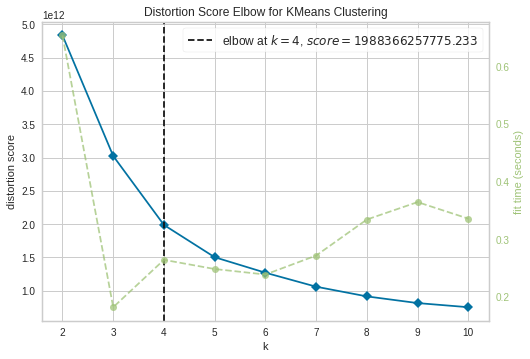

In [42]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model)

visualizer.fit(X) 
visualizer.show()
plt.show()

In [43]:
scala = StandardScaler()
df_2_scaled = scala.fit_transform(X)

In [44]:
outlier_percent = []

for eps in np.linspace(0.001, 5, 100):
    
    dbscan = DBSCAN(eps=eps, min_samples = 22) # a good 'min_samples' number is two times the number of features
    dbscan.fit(df_2_scaled)
    perc_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Percentage of Points Classified as Outliers')

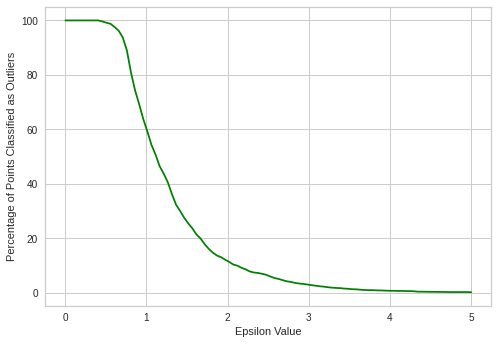

In [45]:
sns.lineplot(x=np.linspace(0.001, 5, 100), y=outlier_percent, color='green')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Points Classified as Outliers')

In [46]:
dend = linkage(df_2_scaled, method = "ward")
dend

array([[1.64000000e+02, 1.65000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.56600000e+03, 5.56900000e+03, 1.74373278e-02, 2.00000000e+00],
       [4.63200000e+03, 4.66000000e+03, 2.15448231e-02, 2.00000000e+00],
       ...,
       [1.19090000e+04, 1.19140000e+04, 8.06007574e+01, 4.69100000e+03],
       [1.19060000e+04, 1.19160000e+04, 9.35973568e+01, 4.86000000e+03],
       [1.19150000e+04, 1.19170000e+04, 1.31874115e+02, 5.96000000e+03]])

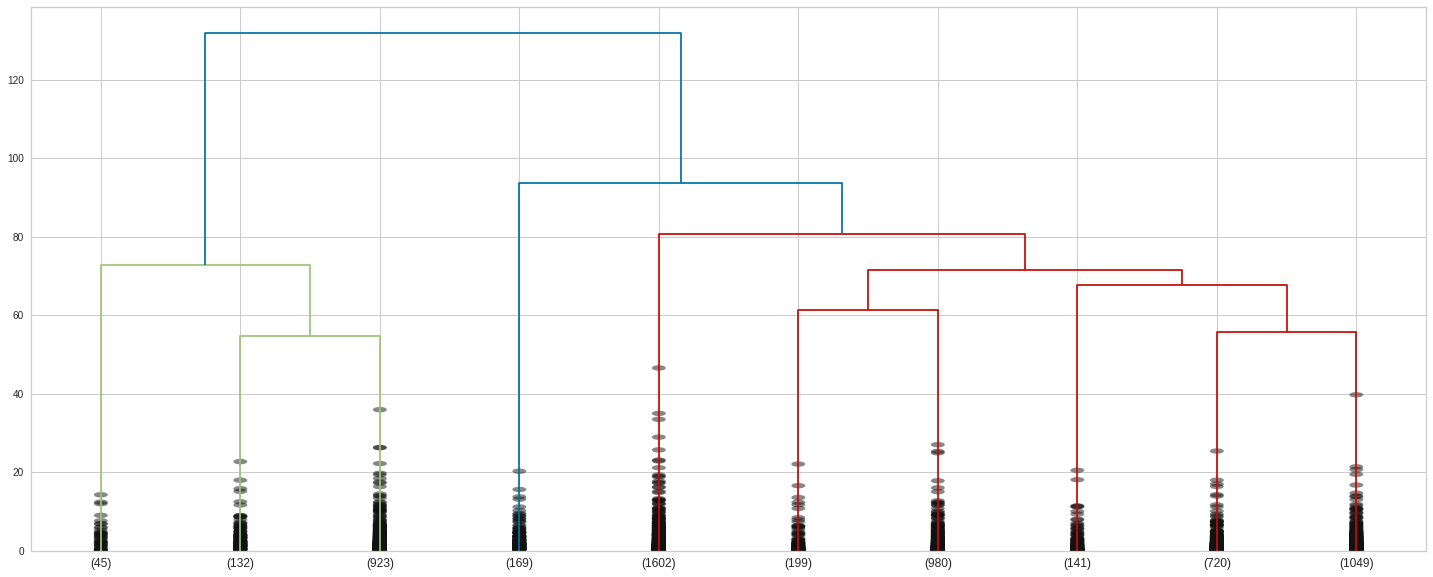

In [47]:
plt.figure(figsize = (25,10))
dendr = dendrogram(dend, truncate_mode="lastp", p = 10, show_leaf_counts = True, show_contracted = True)

In [48]:
df_2_for_clust = preprocessing.normalize(X)
df_2_for_clust

array([[2.34899579e-02, 5.52227556e-01, 8.33359643e-01, ...,
        1.92190565e-04, 7.43526822e-04, 0.00000000e+00],
       [1.61132042e-02, 8.68290995e-01, 4.95790898e-01, ...,
        1.73526814e-04, 4.31564433e-04, 1.23947725e-05],
       [6.96797919e-02, 6.27118127e-01, 7.75768350e-01, ...,
        4.64531946e-04, 1.61741949e-03, 0.00000000e+00],
       ...,
       [7.98546517e-01, 4.83827875e-01, 3.58092608e-01, ...,
        1.34284728e-04, 3.18313806e-04, 0.00000000e+00],
       [8.12970216e-01, 4.56005677e-01, 3.62124818e-01, ...,
        1.44849927e-04, 3.10892144e-04, 0.00000000e+00],
       [8.18471774e-01, 4.44387383e-01, 3.64169866e-01, ...,
        1.45667946e-04, 3.14747637e-04, 0.00000000e+00]])

In [49]:
clusters = DBSCAN(eps = 1.7, min_samples = 22).fit_predict(df_2_for_clust) # I checked with eps 2, 3 the same result, zero outliers

In [50]:
list(clusters).count(-1) # show us how many outliers in the dataset

0

# 6. Algorithm Evaluation #

## 6.1 CatBoost ##

I am planning to start with CatBoost. It's an improved implementation of Gradient Boosting Decision Trees (GBDT). CatBoost solves the problem of Gradient Bias and Prediction Shift, this allows you to reduce the likelihood of overfitting and improve the accuracy of the algorithm.

In [51]:
CBC = CatBoostClassifier()

parameters = {'depth'         : [5,6,7,8,9,10,11, 12],
                'learning_rate' : [0.01,0.02,0.03,0.04,],
                'iterations'    : [30,60,120, 210, 350, 500]
                 }

Rand_CBC = RandomizedSearchCV(estimator=CBC, param_distributions = parameters, cv = 3, n_jobs=-1)
#cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
#n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.
Rand_CBC.fit(X_train, y_train)

0:	learn: 0.6796388	total: 178ms	remaining: 10.5s
1:	learn: 0.6679460	total: 188ms	remaining: 5.45s
2:	learn: 0.6567411	total: 223ms	remaining: 4.24s
3:	learn: 0.6452760	total: 254ms	remaining: 3.55s
4:	learn: 0.6343943	total: 288ms	remaining: 3.17s
5:	learn: 0.6252502	total: 292ms	remaining: 2.63s
6:	learn: 0.6151202	total: 329ms	remaining: 2.49s
7:	learn: 0.6059530	total: 358ms	remaining: 2.33s
8:	learn: 0.5972115	total: 390ms	remaining: 2.21s
9:	learn: 0.5896534	total: 426ms	remaining: 2.13s
10:	learn: 0.5814145	total: 444ms	remaining: 1.98s
11:	learn: 0.5736610	total: 474ms	remaining: 1.9s
12:	learn: 0.5659993	total: 513ms	remaining: 1.85s
13:	learn: 0.5583391	total: 549ms	remaining: 1.8s
14:	learn: 0.5512648	total: 589ms	remaining: 1.77s
15:	learn: 0.5444259	total: 621ms	remaining: 1.71s
16:	learn: 0.5379278	total: 658ms	remaining: 1.66s
17:	learn: 0.5317899	total: 694ms	remaining: 1.62s
18:	learn: 0.5258543	total: 731ms	remaining: 1.58s
19:	learn: 0.5200526	total: 773ms	remaining

41:	learn: 0.4838367	total: 2.09s	remaining: 895ms
42:	learn: 0.4811217	total: 2.15s	remaining: 852ms
43:	learn: 0.4784129	total: 2.23s	remaining: 809ms
44:	learn: 0.4758107	total: 2.28s	remaining: 761ms
45:	learn: 0.4731311	total: 2.37s	remaining: 722ms
46:	learn: 0.4704536	total: 2.46s	remaining: 681ms
47:	learn: 0.4678886	total: 2.52s	remaining: 630ms
48:	learn: 0.4652315	total: 2.58s	remaining: 579ms
49:	learn: 0.4625154	total: 2.65s	remaining: 531ms
50:	learn: 0.4601129	total: 2.7s	remaining: 476ms
51:	learn: 0.4576463	total: 2.76s	remaining: 424ms
52:	learn: 0.4554744	total: 2.82s	remaining: 372ms
53:	learn: 0.4533453	total: 2.85s	remaining: 317ms
54:	learn: 0.4509594	total: 2.92s	remaining: 266ms
55:	learn: 0.4489131	total: 3s	remaining: 214ms
56:	learn: 0.4467416	total: 3.06s	remaining: 161ms
57:	learn: 0.4447859	total: 3.13s	remaining: 108ms
58:	learn: 0.4427998	total: 3.19s	remaining: 54.1ms
59:	learn: 0.4407317	total: 3.27s	remaining: 0us
0:	learn: 0.6892147	total: 274ms	rem

112:	learn: 0.3922644	total: 2.37s	remaining: 4.97s
113:	learn: 0.3912201	total: 2.38s	remaining: 4.92s
114:	learn: 0.3904345	total: 2.38s	remaining: 4.87s
115:	learn: 0.3897286	total: 2.39s	remaining: 4.83s
116:	learn: 0.3889527	total: 2.4s	remaining: 4.78s
117:	learn: 0.3881929	total: 2.41s	remaining: 4.73s
118:	learn: 0.3873259	total: 2.41s	remaining: 4.68s
119:	learn: 0.3866678	total: 2.42s	remaining: 4.64s
120:	learn: 0.3859372	total: 2.43s	remaining: 4.59s
121:	learn: 0.3853036	total: 2.43s	remaining: 4.55s
122:	learn: 0.3842931	total: 2.44s	remaining: 4.51s
123:	learn: 0.3835396	total: 2.45s	remaining: 4.46s
124:	learn: 0.3824308	total: 2.46s	remaining: 4.42s
125:	learn: 0.3817556	total: 2.46s	remaining: 4.38s
126:	learn: 0.3808880	total: 2.47s	remaining: 4.34s
127:	learn: 0.3802220	total: 2.48s	remaining: 4.3s
128:	learn: 0.3794417	total: 2.49s	remaining: 4.26s
129:	learn: 0.3785933	total: 2.49s	remaining: 4.22s
130:	learn: 0.3777221	total: 2.5s	remaining: 4.19s
131:	learn: 0.3

270:	learn: 0.3113106	total: 5.03s	remaining: 1.47s
271:	learn: 0.3110930	total: 5.05s	remaining: 1.45s
272:	learn: 0.3108499	total: 5.06s	remaining: 1.43s
273:	learn: 0.3103861	total: 5.08s	remaining: 1.41s
274:	learn: 0.3100881	total: 5.09s	remaining: 1.39s
275:	learn: 0.3096811	total: 5.1s	remaining: 1.37s
276:	learn: 0.3094453	total: 5.12s	remaining: 1.35s
277:	learn: 0.3092649	total: 5.13s	remaining: 1.33s
278:	learn: 0.3088294	total: 5.15s	remaining: 1.31s
279:	learn: 0.3084034	total: 5.17s	remaining: 1.29s
280:	learn: 0.3082029	total: 5.18s	remaining: 1.27s
281:	learn: 0.3079178	total: 5.19s	remaining: 1.25s
282:	learn: 0.3075916	total: 5.21s	remaining: 1.23s
283:	learn: 0.3071560	total: 5.22s	remaining: 1.21s
284:	learn: 0.3066369	total: 5.27s	remaining: 1.2s
285:	learn: 0.3062974	total: 5.29s	remaining: 1.18s
286:	learn: 0.3059546	total: 5.33s	remaining: 1.17s
287:	learn: 0.3056639	total: 5.36s	remaining: 1.15s
288:	learn: 0.3051498	total: 5.37s	remaining: 1.13s
289:	learn: 0.

79:	learn: 0.4382544	total: 1.33s	remaining: 4.51s
80:	learn: 0.4368699	total: 1.35s	remaining: 4.47s
81:	learn: 0.4353868	total: 1.36s	remaining: 4.45s
82:	learn: 0.4341112	total: 1.37s	remaining: 4.41s
83:	learn: 0.4328576	total: 1.39s	remaining: 4.39s
84:	learn: 0.4311424	total: 1.4s	remaining: 4.37s
85:	learn: 0.4299481	total: 1.41s	remaining: 4.34s
86:	learn: 0.4286946	total: 1.42s	remaining: 4.3s
87:	learn: 0.4275112	total: 1.44s	remaining: 4.29s
88:	learn: 0.4263488	total: 1.46s	remaining: 4.27s
89:	learn: 0.4253329	total: 1.47s	remaining: 4.25s
90:	learn: 0.4243042	total: 1.48s	remaining: 4.22s
91:	learn: 0.4231794	total: 1.49s	remaining: 4.19s
92:	learn: 0.4220375	total: 1.51s	remaining: 4.18s
93:	learn: 0.4208771	total: 1.53s	remaining: 4.16s
94:	learn: 0.4198125	total: 1.55s	remaining: 4.17s
95:	learn: 0.4188149	total: 1.57s	remaining: 4.16s
96:	learn: 0.4176274	total: 1.61s	remaining: 4.21s
97:	learn: 0.4173606	total: 1.63s	remaining: 4.18s
98:	learn: 0.4162184	total: 1.64s

237:	learn: 0.3322530	total: 3.81s	remaining: 1.79s
238:	learn: 0.3317263	total: 3.83s	remaining: 1.78s
239:	learn: 0.3314042	total: 3.84s	remaining: 1.76s
240:	learn: 0.3310401	total: 3.87s	remaining: 1.75s
241:	learn: 0.3306011	total: 3.89s	remaining: 1.73s
242:	learn: 0.3302619	total: 3.9s	remaining: 1.72s
243:	learn: 0.3299238	total: 3.92s	remaining: 1.7s
244:	learn: 0.3295440	total: 3.93s	remaining: 1.69s
245:	learn: 0.3291799	total: 3.94s	remaining: 1.67s
246:	learn: 0.3288443	total: 3.95s	remaining: 1.65s
247:	learn: 0.3284508	total: 3.96s	remaining: 1.63s
248:	learn: 0.3281297	total: 3.98s	remaining: 1.61s
249:	learn: 0.3276222	total: 4s	remaining: 1.6s
250:	learn: 0.3273049	total: 4.02s	remaining: 1.59s
251:	learn: 0.3267097	total: 4.04s	remaining: 1.57s
252:	learn: 0.3264926	total: 4.07s	remaining: 1.56s
253:	learn: 0.3262063	total: 4.09s	remaining: 1.55s
254:	learn: 0.3258639	total: 4.11s	remaining: 1.53s
255:	learn: 0.3254931	total: 4.13s	remaining: 1.52s
256:	learn: 0.3251

46:	learn: 0.3493296	total: 761ms	remaining: 4.91s
47:	learn: 0.3475327	total: 775ms	remaining: 4.88s
48:	learn: 0.3452484	total: 794ms	remaining: 4.88s
49:	learn: 0.3430730	total: 818ms	remaining: 4.91s
50:	learn: 0.3412211	total: 833ms	remaining: 4.88s
51:	learn: 0.3392488	total: 846ms	remaining: 4.85s
52:	learn: 0.3381033	total: 858ms	remaining: 4.81s
53:	learn: 0.3366837	total: 883ms	remaining: 4.84s
54:	learn: 0.3353898	total: 899ms	remaining: 4.82s
55:	learn: 0.3339032	total: 910ms	remaining: 4.78s
56:	learn: 0.3320705	total: 930ms	remaining: 4.78s
57:	learn: 0.3298212	total: 941ms	remaining: 4.74s
58:	learn: 0.3284492	total: 974ms	remaining: 4.8s
59:	learn: 0.3269634	total: 997ms	remaining: 4.82s
60:	learn: 0.3257307	total: 1.02s	remaining: 4.85s
61:	learn: 0.3238678	total: 1.04s	remaining: 4.82s
62:	learn: 0.3221898	total: 1.06s	remaining: 4.84s
63:	learn: 0.3210078	total: 1.07s	remaining: 4.79s
64:	learn: 0.3202946	total: 1.1s	remaining: 4.84s
65:	learn: 0.3185733	total: 1.14s

205:	learn: 0.2049270	total: 3.38s	remaining: 2.36s
206:	learn: 0.2039557	total: 3.39s	remaining: 2.34s
207:	learn: 0.2029054	total: 3.41s	remaining: 2.33s
208:	learn: 0.2024910	total: 3.42s	remaining: 2.31s
209:	learn: 0.2021019	total: 3.44s	remaining: 2.29s
210:	learn: 0.2016022	total: 3.45s	remaining: 2.27s
211:	learn: 0.2010106	total: 3.46s	remaining: 2.25s
212:	learn: 0.2007473	total: 3.48s	remaining: 2.24s
213:	learn: 0.2003091	total: 3.49s	remaining: 2.22s
214:	learn: 0.1999600	total: 3.51s	remaining: 2.2s
215:	learn: 0.1994563	total: 3.52s	remaining: 2.19s
216:	learn: 0.1984560	total: 3.53s	remaining: 2.16s
217:	learn: 0.1981548	total: 3.54s	remaining: 2.15s
218:	learn: 0.1974212	total: 3.56s	remaining: 2.13s
219:	learn: 0.1970388	total: 3.58s	remaining: 2.11s
220:	learn: 0.1966162	total: 3.59s	remaining: 2.1s
221:	learn: 0.1960771	total: 3.61s	remaining: 2.08s
222:	learn: 0.1952566	total: 3.62s	remaining: 2.06s
223:	learn: 0.1948789	total: 3.63s	remaining: 2.04s
224:	learn: 0.

332:	learn: 0.1478494	total: 5.43s	remaining: 277ms
333:	learn: 0.1473455	total: 5.45s	remaining: 261ms
334:	learn: 0.1469932	total: 5.46s	remaining: 245ms
335:	learn: 0.1466171	total: 5.49s	remaining: 229ms
336:	learn: 0.1463695	total: 5.51s	remaining: 213ms
337:	learn: 0.1458515	total: 5.53s	remaining: 196ms
338:	learn: 0.1453073	total: 5.55s	remaining: 180ms
339:	learn: 0.1447574	total: 5.55s	remaining: 163ms
340:	learn: 0.1445888	total: 5.57s	remaining: 147ms
341:	learn: 0.1443350	total: 5.58s	remaining: 130ms
342:	learn: 0.1440312	total: 5.58s	remaining: 114ms
343:	learn: 0.1435843	total: 5.59s	remaining: 97.6ms
344:	learn: 0.1433118	total: 5.61s	remaining: 81.3ms
345:	learn: 0.1430852	total: 5.62s	remaining: 64.9ms
346:	learn: 0.1426682	total: 5.64s	remaining: 48.7ms
347:	learn: 0.1422810	total: 5.66s	remaining: 32.5ms
348:	learn: 0.1420054	total: 5.68s	remaining: 16.3ms
349:	learn: 0.1417694	total: 5.7s	remaining: 0us
0:	learn: 0.6768980	total: 104ms	remaining: 6.13s
1:	learn: 0

23:	learn: 0.5448848	total: 392ms	remaining: 588ms
24:	learn: 0.5407289	total: 405ms	remaining: 566ms
25:	learn: 0.5364975	total: 420ms	remaining: 549ms
26:	learn: 0.5324668	total: 430ms	remaining: 525ms
27:	learn: 0.5286533	total: 441ms	remaining: 504ms
28:	learn: 0.5248954	total: 446ms	remaining: 477ms
29:	learn: 0.5214802	total: 463ms	remaining: 463ms
30:	learn: 0.5179755	total: 483ms	remaining: 452ms
31:	learn: 0.5145233	total: 489ms	remaining: 428ms
32:	learn: 0.5110365	total: 514ms	remaining: 421ms
33:	learn: 0.5077042	total: 519ms	remaining: 397ms
34:	learn: 0.5042979	total: 550ms	remaining: 393ms
35:	learn: 0.5012224	total: 556ms	remaining: 371ms
36:	learn: 0.4982350	total: 563ms	remaining: 350ms
37:	learn: 0.4952232	total: 579ms	remaining: 335ms
38:	learn: 0.4922171	total: 594ms	remaining: 320ms
39:	learn: 0.4893537	total: 610ms	remaining: 305ms
40:	learn: 0.4869847	total: 622ms	remaining: 288ms
41:	learn: 0.4842758	total: 629ms	remaining: 269ms
42:	learn: 0.4816179	total: 647

64:	learn: 0.3887275	total: 11.9s	remaining: 52s
65:	learn: 0.3860450	total: 12.1s	remaining: 51.9s
66:	learn: 0.3830361	total: 12.3s	remaining: 51.8s
67:	learn: 0.3805451	total: 12.5s	remaining: 51.8s
68:	learn: 0.3783653	total: 12.7s	remaining: 51.7s
69:	learn: 0.3762062	total: 12.9s	remaining: 51.6s
70:	learn: 0.3733271	total: 13.1s	remaining: 51.6s
71:	learn: 0.3714855	total: 13.4s	remaining: 51.6s
72:	learn: 0.3685290	total: 13.6s	remaining: 51.4s
73:	learn: 0.3662948	total: 13.8s	remaining: 51.4s
74:	learn: 0.3636525	total: 13.9s	remaining: 51.1s
75:	learn: 0.3617353	total: 14.1s	remaining: 51s
76:	learn: 0.3598341	total: 14.4s	remaining: 50.9s
77:	learn: 0.3579456	total: 14.5s	remaining: 50.7s
78:	learn: 0.3561378	total: 14.7s	remaining: 50.5s
79:	learn: 0.3540240	total: 14.9s	remaining: 50.3s
80:	learn: 0.3521304	total: 15.2s	remaining: 50.3s
81:	learn: 0.3509402	total: 15.2s	remaining: 49.7s
82:	learn: 0.3488487	total: 15.4s	remaining: 49.7s
83:	learn: 0.3464431	total: 15.7s	r

223:	learn: 0.2047413	total: 46.6s	remaining: 26.2s
224:	learn: 0.2042511	total: 46.8s	remaining: 26s
225:	learn: 0.2033279	total: 47.1s	remaining: 25.9s
226:	learn: 0.2027379	total: 47.3s	remaining: 25.6s
227:	learn: 0.2022530	total: 47.5s	remaining: 25.4s
228:	learn: 0.2019815	total: 47.7s	remaining: 25.2s
229:	learn: 0.2013543	total: 47.9s	remaining: 25s
230:	learn: 0.2009170	total: 48.1s	remaining: 24.8s
231:	learn: 0.2001028	total: 48.3s	remaining: 24.6s
232:	learn: 0.1998398	total: 48.5s	remaining: 24.4s
233:	learn: 0.1990801	total: 48.7s	remaining: 24.2s
234:	learn: 0.1985146	total: 49s	remaining: 24s
235:	learn: 0.1981814	total: 49.2s	remaining: 23.8s
236:	learn: 0.1974611	total: 49.4s	remaining: 23.5s
237:	learn: 0.1967629	total: 49.6s	remaining: 23.3s
238:	learn: 0.1962154	total: 49.8s	remaining: 23.1s
239:	learn: 0.1955375	total: 50s	remaining: 22.9s
240:	learn: 0.1951161	total: 50.3s	remaining: 22.7s
241:	learn: 0.1944816	total: 50.5s	remaining: 22.5s
242:	learn: 0.1940073	

190:	learn: 0.3831683	total: 2.21s	remaining: 3.58s
191:	learn: 0.3828090	total: 2.22s	remaining: 3.56s
192:	learn: 0.3822521	total: 2.23s	remaining: 3.55s
193:	learn: 0.3817781	total: 2.24s	remaining: 3.53s
194:	learn: 0.3813147	total: 2.26s	remaining: 3.53s
195:	learn: 0.3808359	total: 2.27s	remaining: 3.52s
196:	learn: 0.3804843	total: 2.28s	remaining: 3.51s
197:	learn: 0.3801053	total: 2.29s	remaining: 3.5s
198:	learn: 0.3797950	total: 2.3s	remaining: 3.48s
199:	learn: 0.3794902	total: 2.31s	remaining: 3.47s
200:	learn: 0.3791071	total: 2.33s	remaining: 3.46s
201:	learn: 0.3786962	total: 2.34s	remaining: 3.45s
202:	learn: 0.3783350	total: 2.35s	remaining: 3.44s
203:	learn: 0.3780385	total: 2.36s	remaining: 3.42s
204:	learn: 0.3776617	total: 2.38s	remaining: 3.42s
205:	learn: 0.3773703	total: 2.4s	remaining: 3.42s
206:	learn: 0.3771058	total: 2.4s	remaining: 3.4s
207:	learn: 0.3767631	total: 2.44s	remaining: 3.42s
208:	learn: 0.3763973	total: 2.45s	remaining: 3.41s
209:	learn: 0.376

6:	learn: 0.6539816	total: 90.5ms	remaining: 6.37s
7:	learn: 0.6489988	total: 107ms	remaining: 6.57s
8:	learn: 0.6440004	total: 133ms	remaining: 7.28s
9:	learn: 0.6386776	total: 156ms	remaining: 7.65s
10:	learn: 0.6340590	total: 173ms	remaining: 7.69s
11:	learn: 0.6294432	total: 187ms	remaining: 7.62s
12:	learn: 0.6249401	total: 202ms	remaining: 7.58s
13:	learn: 0.6199136	total: 224ms	remaining: 7.78s
14:	learn: 0.6154175	total: 241ms	remaining: 7.8s
15:	learn: 0.6107544	total: 261ms	remaining: 7.89s
16:	learn: 0.6071151	total: 285ms	remaining: 8.09s
17:	learn: 0.6026677	total: 301ms	remaining: 8.05s
18:	learn: 0.5985192	total: 324ms	remaining: 8.21s
19:	learn: 0.5944211	total: 333ms	remaining: 7.99s
20:	learn: 0.5907615	total: 360ms	remaining: 8.2s
21:	learn: 0.5872232	total: 379ms	remaining: 8.24s
22:	learn: 0.5838304	total: 398ms	remaining: 8.26s
23:	learn: 0.5800384	total: 417ms	remaining: 8.27s
24:	learn: 0.5763320	total: 437ms	remaining: 8.29s
25:	learn: 0.5732007	total: 447ms	re

324:	learn: 0.3507479	total: 4.22s	remaining: 2.27s
325:	learn: 0.3505333	total: 4.24s	remaining: 2.26s
326:	learn: 0.3503672	total: 4.25s	remaining: 2.25s
327:	learn: 0.3501100	total: 4.27s	remaining: 2.24s
328:	learn: 0.3497880	total: 4.28s	remaining: 2.22s
329:	learn: 0.3495981	total: 4.29s	remaining: 2.21s
330:	learn: 0.3494541	total: 4.3s	remaining: 2.2s
331:	learn: 0.3492560	total: 4.32s	remaining: 2.19s
332:	learn: 0.3490953	total: 4.33s	remaining: 2.17s
333:	learn: 0.3489545	total: 4.34s	remaining: 2.16s
334:	learn: 0.3488192	total: 4.35s	remaining: 2.14s
335:	learn: 0.3486222	total: 4.37s	remaining: 2.13s
336:	learn: 0.3484002	total: 4.38s	remaining: 2.12s
337:	learn: 0.3481711	total: 4.39s	remaining: 2.1s
338:	learn: 0.3479865	total: 4.41s	remaining: 2.09s
339:	learn: 0.3477220	total: 4.43s	remaining: 2.08s
340:	learn: 0.3474022	total: 4.44s	remaining: 2.07s
341:	learn: 0.3472177	total: 4.45s	remaining: 2.06s
342:	learn: 0.3470957	total: 4.47s	remaining: 2.04s
343:	learn: 0.3

482:	learn: 0.3221808	total: 5.97s	remaining: 210ms
483:	learn: 0.3220832	total: 5.98s	remaining: 198ms
484:	learn: 0.3219339	total: 6s	remaining: 186ms
485:	learn: 0.3217839	total: 6.01s	remaining: 173ms
486:	learn: 0.3217040	total: 6.02s	remaining: 161ms
487:	learn: 0.3215690	total: 6.04s	remaining: 148ms
488:	learn: 0.3213755	total: 6.05s	remaining: 136ms
489:	learn: 0.3212322	total: 6.06s	remaining: 124ms
490:	learn: 0.3210878	total: 6.07s	remaining: 111ms
491:	learn: 0.3209331	total: 6.08s	remaining: 99ms
492:	learn: 0.3206929	total: 6.1s	remaining: 86.7ms
493:	learn: 0.3205542	total: 6.11s	remaining: 74.2ms
494:	learn: 0.3204251	total: 6.12s	remaining: 61.8ms
495:	learn: 0.3202748	total: 6.13s	remaining: 49.4ms
496:	learn: 0.3201335	total: 6.14s	remaining: 37.1ms
497:	learn: 0.3199201	total: 6.16s	remaining: 24.7ms
498:	learn: 0.3197881	total: 6.2s	remaining: 12.4ms
499:	learn: 0.3196125	total: 6.23s	remaining: 0us
0:	learn: 0.6867051	total: 10.1ms	remaining: 5.02s
1:	learn: 0.68

300:	learn: 0.3600981	total: 4.98s	remaining: 3.29s
301:	learn: 0.3599564	total: 4.99s	remaining: 3.27s
302:	learn: 0.3597738	total: 4.99s	remaining: 3.25s
303:	learn: 0.3594576	total: 5.01s	remaining: 3.23s
304:	learn: 0.3591372	total: 5.02s	remaining: 3.21s
305:	learn: 0.3589393	total: 5.03s	remaining: 3.19s
306:	learn: 0.3587409	total: 5.03s	remaining: 3.16s
307:	learn: 0.3585833	total: 5.04s	remaining: 3.14s
308:	learn: 0.3583597	total: 5.05s	remaining: 3.12s
309:	learn: 0.3581472	total: 5.06s	remaining: 3.1s
310:	learn: 0.3579094	total: 5.07s	remaining: 3.08s
311:	learn: 0.3576883	total: 5.08s	remaining: 3.06s
312:	learn: 0.3574629	total: 5.09s	remaining: 3.04s
313:	learn: 0.3571809	total: 5.1s	remaining: 3.02s
314:	learn: 0.3568535	total: 5.11s	remaining: 3s
315:	learn: 0.3565965	total: 5.12s	remaining: 2.98s
316:	learn: 0.3563972	total: 5.14s	remaining: 2.97s
317:	learn: 0.3561460	total: 5.17s	remaining: 2.96s
318:	learn: 0.3558643	total: 5.18s	remaining: 2.94s
319:	learn: 0.355

0:	learn: 0.6667949	total: 54.8ms	remaining: 19.1s
1:	learn: 0.6414932	total: 63.9ms	remaining: 11.1s
2:	learn: 0.6181716	total: 72.8ms	remaining: 8.42s
3:	learn: 0.5981606	total: 81.7ms	remaining: 7.07s
4:	learn: 0.5797603	total: 90.8ms	remaining: 6.26s
5:	learn: 0.5636385	total: 99.7ms	remaining: 5.72s
6:	learn: 0.5497698	total: 109ms	remaining: 5.33s
7:	learn: 0.5351517	total: 118ms	remaining: 5.04s
8:	learn: 0.5229007	total: 125ms	remaining: 4.74s
9:	learn: 0.5095707	total: 134ms	remaining: 4.56s
10:	learn: 0.4990892	total: 143ms	remaining: 4.4s
11:	learn: 0.4897896	total: 152ms	remaining: 4.27s
12:	learn: 0.4817723	total: 160ms	remaining: 4.16s
13:	learn: 0.4742456	total: 169ms	remaining: 4.06s
14:	learn: 0.4656334	total: 178ms	remaining: 3.98s
15:	learn: 0.4585082	total: 187ms	remaining: 3.9s
16:	learn: 0.4509719	total: 196ms	remaining: 3.84s
17:	learn: 0.4448236	total: 205ms	remaining: 3.77s
18:	learn: 0.4397163	total: 213ms	remaining: 3.71s
19:	learn: 0.4328392	total: 221ms	rem

170:	learn: 0.2277769	total: 1.71s	remaining: 1.78s
171:	learn: 0.2271903	total: 1.72s	remaining: 1.78s
172:	learn: 0.2266487	total: 1.74s	remaining: 1.78s
173:	learn: 0.2260232	total: 1.75s	remaining: 1.77s
174:	learn: 0.2256138	total: 1.76s	remaining: 1.76s
175:	learn: 0.2250764	total: 1.77s	remaining: 1.75s
176:	learn: 0.2244700	total: 1.78s	remaining: 1.74s
177:	learn: 0.2235245	total: 1.79s	remaining: 1.73s
178:	learn: 0.2223505	total: 1.8s	remaining: 1.72s
179:	learn: 0.2219096	total: 1.81s	remaining: 1.71s
180:	learn: 0.2214849	total: 1.82s	remaining: 1.7s
181:	learn: 0.2209148	total: 1.83s	remaining: 1.69s
182:	learn: 0.2204167	total: 1.84s	remaining: 1.68s
183:	learn: 0.2196266	total: 1.85s	remaining: 1.67s
184:	learn: 0.2185260	total: 1.85s	remaining: 1.65s
185:	learn: 0.2179240	total: 1.86s	remaining: 1.64s
186:	learn: 0.2169588	total: 1.87s	remaining: 1.63s
187:	learn: 0.2163281	total: 1.88s	remaining: 1.62s
188:	learn: 0.2157686	total: 1.89s	remaining: 1.61s
189:	learn: 0.

332:	learn: 0.1461136	total: 3.35s	remaining: 171ms
333:	learn: 0.1455855	total: 3.36s	remaining: 161ms
334:	learn: 0.1453601	total: 3.39s	remaining: 152ms
335:	learn: 0.1450799	total: 3.4s	remaining: 142ms
336:	learn: 0.1447067	total: 3.41s	remaining: 132ms
337:	learn: 0.1444240	total: 3.42s	remaining: 121ms
338:	learn: 0.1438092	total: 3.43s	remaining: 111ms
339:	learn: 0.1435254	total: 3.44s	remaining: 101ms
340:	learn: 0.1428446	total: 3.45s	remaining: 91ms
341:	learn: 0.1426878	total: 3.46s	remaining: 80.9ms
342:	learn: 0.1424133	total: 3.47s	remaining: 70.8ms
343:	learn: 0.1420299	total: 3.48s	remaining: 60.6ms
344:	learn: 0.1418806	total: 3.48s	remaining: 50.5ms
345:	learn: 0.1415115	total: 3.49s	remaining: 40.4ms
346:	learn: 0.1410263	total: 3.5s	remaining: 30.3ms
347:	learn: 0.1406926	total: 3.51s	remaining: 20.2ms
348:	learn: 0.1401339	total: 3.52s	remaining: 10.1ms
349:	learn: 0.1397205	total: 3.53s	remaining: 0us


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f46514aee50>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 6, 7, 8, 9, 10, 11, 12],
                                        'iterations': [30, 60, 120, 210, 350,
                                                       500],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]})

In [52]:
print(" Results from Randomized Search " )
print("\n The best score across ALL searched params:\n",Rand_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Rand_CBC.best_params_)
print(metrics.confusion_matrix(y_test, Rand_CBC.predict(X_test)))

 Results from Randomized Search 

 The best score across ALL searched params:
 0.933053774202716

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'iterations': 350, 'depth': 7}
[[875  79]
 [ 41 914]]


In [53]:
print(classification_report(y_test, Rand_CBC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       954
           1       0.92      0.96      0.94       955

    accuracy                           0.94      1909
   macro avg       0.94      0.94      0.94      1909
weighted avg       0.94      0.94      0.94      1909



## 6.2 Logistic Regression ##

In [54]:
Log_reg_pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("Log_reg", LogisticRegression())
])

In [58]:
parameters = {
    'Log_reg__solver' : ['liblinear', 'saga'],
    'Log_reg__C' :[ 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    'Log_reg__penalty' : ["l1", "l2"]
}

In [59]:
rand_search_Log_reg = RandomizedSearchCV(Log_reg_pipeline , param_distributions = parameters, cv = 3, n_jobs=-1)

In [60]:
rand_search_Log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('Log_reg',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'Log_reg__C': [0.001, 0.01, 0.1, 1, 10,
                                                       100, 1000, 10000],
                                        'Log_reg__penalty': ['l1', 'l2'],
                                        'Log_reg__solver': ['liblinear',
                                                            'saga']})

In [61]:
# Predict the labels of the test set
y_pred = rand_search_Log_reg.predict(X_test)

# Compute and print metrics
print(f'Accuracy: {rand_search_Log_reg.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {rand_search_Log_reg.best_params_}')
print(metrics.confusion_matrix(y_test, rand_search_Log_reg.predict(X_test)))

Accuracy: 0.71503404924044
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       954
           1       0.75      0.65      0.70       955

    accuracy                           0.72      1909
   macro avg       0.72      0.72      0.71      1909
weighted avg       0.72      0.72      0.71      1909

Tuned Model Parameters: {'Log_reg__solver': 'liblinear', 'Log_reg__penalty': 'l2', 'Log_reg__C': 1}
[[745 209]
 [335 620]]


## 6.3 Support Vector Classification ##

In [62]:
SVM_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("SVM", SVC())
])

In [63]:
parameters = {
    'SVM__C':[0.001, 0.1, 1, 10, 100],
    'SVM__gamma':[0.01, 0.1, 1],
    'SVM__kernel' : ['linear', 'rbf'],
}

In [64]:
rand_search_svc = RandomizedSearchCV(SVM_pipeline, param_distributions = parameters, cv = 3, n_jobs=-1)

In [65]:
rand_search_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVM', SVC())]),
                   n_jobs=-1,
                   param_distributions={'SVM__C': [0.001, 0.1, 1, 10, 100],
                                        'SVM__gamma': [0.01, 0.1, 1],
                                        'SVM__kernel': ['linear', 'rbf']})

In [66]:
# Predict the labels of the test set
y_pred = rand_search_svc.predict(X_test)

# Compute and print metrics
print(f'Accuracy: {rand_search_svc.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {rand_search_svc.best_params_}')
print(metrics.confusion_matrix(y_test, rand_search_svc.predict(X_test)))

Accuracy: 0.9759036144578314
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       954
           1       0.96      0.99      0.98       955

    accuracy                           0.98      1909
   macro avg       0.98      0.98      0.98      1909
weighted avg       0.98      0.98      0.98      1909

Tuned Model Parameters: {'SVM__kernel': 'rbf', 'SVM__gamma': 1, 'SVM__C': 100}
[[913  41]
 [  5 950]]


# 7. ROC AUC metric for KNeighborsClassifier, Decision Tree, RandomForestClassifier, GBoost, LinearDiscriminantAnalysis, LGBMClassifier, AdaboostClassifier models with default settings #

In [67]:
roc_auc_scorer = make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_treshold = True)

In [68]:
knc = KNeighborsClassifier() 
knc.fit(X_train, y_train) 

dr = DecisionTreeClassifier()
dr.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

nn = MLPClassifier()
nn.fit(X_train, y_train)

GB = Gboost()
GB.fit(X_train, y_train)

lda =LDA()
lda.fit(X_train, y_train)

lgb = lgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [69]:
models =   [knc, dr, rf, nn, GB, lda, lgb, ada]
test_list = []
to_train_list = []

for model in models:
    test_list.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    to_train_list.append(metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
                        
                        
names =['KNC','DecisionTree', 'RandomForest', 'NN','GB','LDA','LGBM','ADA']
names2 =[i+', '+i for i in names]
print(names2)
names2 =', '.join(names2) 
print(names2)
names2 = names2.split(', ')
print(names2)
    
print()
data = [[test_list[i], to_train_list[i]] for i in range(8)]
print(data)
data = np.array(data).flatten()
print(data)

['KNC, KNC', 'DecisionTree, DecisionTree', 'RandomForest, RandomForest', 'NN, NN', 'GB, GB', 'LDA, LDA', 'LGBM, LGBM', 'ADA, ADA']
KNC, KNC, DecisionTree, DecisionTree, RandomForest, RandomForest, NN, NN, GB, GB, LDA, LDA, LGBM, LGBM, ADA, ADA
['KNC', 'KNC', 'DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'NN', 'NN', 'GB', 'GB', 'LDA', 'LDA', 'LGBM', 'LGBM', 'ADA', 'ADA']

[[0.8333009538235262, 0.9417637236373303], [0.943928018703283, 1.0], [0.9968383329491696, 1.0], [0.6882670925395414, 0.7087145035258243], [0.9361393745815362, 0.9549422093261472], [0.7873730887857134, 0.7965912592292342], [0.9807073002074483, 0.9969782719259366], [0.9179119057811145, 0.9286003076274133]]
[0.83330095 0.94176372 0.94392802 1.         0.99683833 1.
 0.68826709 0.7087145  0.93613937 0.95494221 0.78737309 0.79659126
 0.9807073  0.99697827 0.91791191 0.92860031]


<AxesSubplot:xlabel='Name', ylabel='Data'>

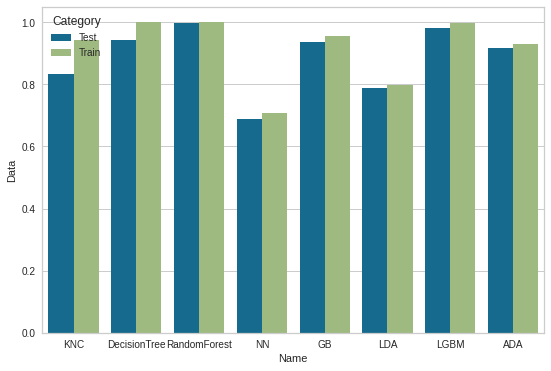

In [70]:
plt.figure(figsize=(9,6))
data1 = {'Name': names2,
         'Data': data,
         'Category': ['Test', 'Train'] * 8}
df2 = pd.DataFrame(data1)
df2
sns.barplot(x='Name',y ='Data', data=df2, hue='Category')

In [71]:
df2

,Name,Data,Category
0,KNC,0.833301,Test
1,KNC,0.941764,Train
2,DecisionTree,0.943928,Test
3,DecisionTree,1.000000,Train
4,RandomForest,0.996838,Test
5,RandomForest,1.000000,Train
6,NN,0.688267,Test
7,NN,0.708715,Train
8,GB,0.936139,Test
9,GB,0.954942,Train


# 8. Improve KNC #

In [72]:
KNC_pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ('pca', PCA()),
    ("KNC", KNeighborsClassifier())
])

In [73]:
param_grid = {
    'KNC__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

In [74]:
grid_KNC = GridSearchCV(KNC_pipeline, param_grid, cv = 3, n_jobs=-1)

In [75]:
grid_KNC.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('KNC', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNC__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [76]:
# Predict the labels of the test set
y_pred = grid_KNC.predict(X_test)

# Compute and print metrics
print(f'Accuracy: {grid_KNC.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {grid_KNC.best_params_}')
print(f'ROC AUC: {metrics.roc_auc_score(y_test, grid_KNC.predict_proba(X_test)[:,1])}')
print(metrics.confusion_matrix(y_test, grid_KNC.predict(X_test)))

Accuracy: 0.9869041382922996
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       954
           1       0.98      0.99      0.99       955

    accuracy                           0.99      1909
   macro avg       0.99      0.99      0.99      1909
weighted avg       0.99      0.99      0.99      1909

Tuned Model Parameters: {'KNC__n_neighbors': 1}
ROC AUC: 0.9869005674646296
[[935  19]
 [  6 949]]
251:	learn: 0.1977270	total: 36.7s	remaining: 14.3s
252:	learn: 0.1974171	total: 36.8s	remaining: 14.1s
253:	learn: 0.1971939	total: 36.9s	remaining: 14s
254:	learn: 0.1964158	total: 37.1s	remaining: 13.8s
255:	learn: 0.1959153	total: 37.2s	remaining: 13.7s
256:	learn: 0.1952965	total: 37.3s	remaining: 13.5s
257:	learn: 0.1946533	total: 37.4s	remaining: 13.3s
258:	learn: 0.1940620	total: 37.5s	remaining: 13.2s
259:	learn: 0.1936443	total: 37.6s	remaining: 13s
260:	learn: 0.1932303	total: 37.7s	remaining: 12.9s
261:	learn: 0.1925831	total: 

# 9. Result Presentation #

 In 6. Algorithm Evaluation the best results were presented by SVM, and the worst by Logistic Regression, bearing in mind that all financial institutions adhere to the rule of using  models which be builted from predictive modeling tools and must be sufficiently interpretable to provide a reason for any adverse actions (rejections). A suitable option is to include other non-interpretable models the general model. 
 
 We also found that most boosting models without any additional tuning and settings of hyperparameters performed better than Logistic Regression.

The poor performance of the neural network can be due to several factors, the first being the small dataset and absent of hyperparameters and settings. 

Random Forest model gives best results without tuning.

# 10. Resources #

https://www.kaggle.com/code/aayush7kumar/clustering-using-k-means-hierarchical-and-dbscan/notebook,

https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#aed2, 

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier,

https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-classification,

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html,

https://www.kaggle.com/datasets/ajay1735/hmeq-data,

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html,

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html